In [2]:
import numpy as np
from collections import defaultdict
data = np.loadtxt('ls_hist/final_params.txt')



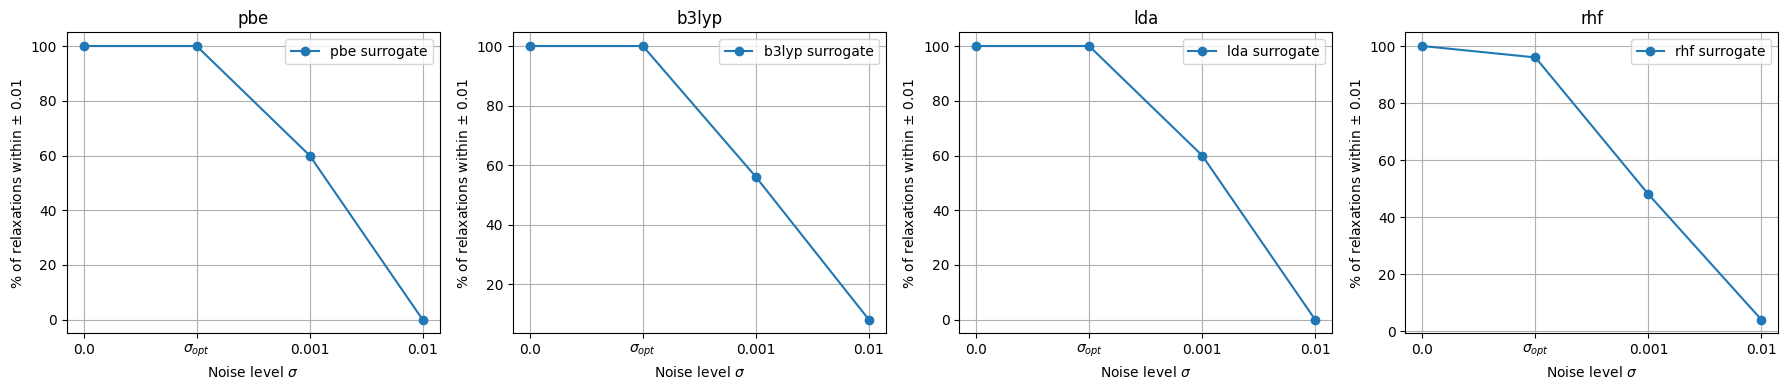

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from params import pes_dict
from run2_surrogate import surrogates

data = np.loadtxt('ls_hist/final_params.txt')
epsilon_p = [0.01, 0.01]
runs_per_config = 25
xc_ls_list = list(pes_dict.keys())

# Original sigmas collection order
sigmas_collected = [0.0, 0.01, 0.001, r'$\sigma_{opt}$']
# Desired x-axis label order
x_labels = [0.0, r'$\sigma_{opt}$', 0.001, 0.01]
x_positions = range(len(x_labels))

fig, axes = plt.subplots(1, 4, figsize=(18, 4))
axes = axes.flatten()

i = 0  # index for slicing data
for ax_idx, xc_srg in enumerate(xc_ls_list):
    ref_params = surrogates['b3lyp'].structure.params
    success_percentages = []

    # collect success percentages in collected sigmas order
    for sig in sigmas_collected:
        runs = data[i*runs_per_config:(i+1)*runs_per_config]
        par0_res = runs[:, 1]
        par1_res = runs[:, 2]

        within_bounds = (
            (np.abs(par0_res - ref_params[0]) <= epsilon_p[0]) &
            (np.abs(par1_res - ref_params[1]) <= epsilon_p[1])
        )
        percent_within = 100 * np.sum(within_bounds) / len(within_bounds)
        success_percentages.append(percent_within)
        i += 1

    # Reorder percentages to match desired x_labels
    label_to_index = {s: idx for idx, s in enumerate(sigmas_collected)}
    reordered_percentages = [success_percentages[label_to_index[l]] for l in x_labels]

    ax = axes[ax_idx]
    ax.plot(x_positions, reordered_percentages, marker='o', label=f'{xc_srg} surrogate')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel(r'Noise level $\sigma$')
    ax.set_ylabel(r'% of relaxations within $\pm$ 0.01 ')
    ax.set_title(xc_srg)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('figures/ls_hist_res.png')
plt.show()


In [21]:
cobyla = np.mean([2.330000000000000000e+02, 2.570000000000000000e+02,
 2.440000000000000000e+02,
 1.850000000000000000e+02,
 2.450000000000000000e+02])
print(cobyla)
bfgs = np.mean([5.250000000000000000e+02,
 6.500000000000000000e+02,
 6.750000000000000000e+02,
 6.750000000000000000e+02,
 5.250000000000000000e+02])
print(bfgs)

232.8
610.0
